## **Deep AutoVIML** - NLP task
Reference:
* https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_NLP_Demo.ipynb 

In [19]:
#! pip install deep_autoviml

In [ ]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


## Load Dataset
Using Kaggle [Coronavirus Tweet Dataset](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification) provided by user Aman Miglani

**Text Classification**: To predict sentiment ('Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive') of tweets

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d datatattle/covid-19-nlp-text-classification

  0% 0.00/4.38M [00:00<?, ?B/s]
100% 4.38M/4.38M [00:00<00:00, 40.2MB/s]


In [ ]:
! unzip covid-19-nlp-text-classification

Archive:  covid-19-nlp-text-classification.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [ ]:
trainpath = "/content/Corona_NLP_train.csv"
df_train = pd.read_csv(trainpath, encoding='ISO-8859-1')

In [ ]:
df_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [21]:
df_train = df_train[['OriginalTweet','Sentiment']]

In [ ]:
target = 'Sentiment'
df_train[target].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

# Deep AutoVIML

### Model Config

In [23]:
keras_model_type =  "auto" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 20, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

### Model Training

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 20
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Multi_Classification and Single_Label problem
Loaded a small data sample of size = (10000, 6) into pandas dataframe to analyze...
    Classifyi

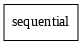

Model plot saved in file: deep_autoviml_tweet_classification_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.273074474856779, 1: 1.3679890560875514, 2: 1.0, 3: 1.1305822498586773, 4: 1.0}
    original datasize = 10000, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 3140
    number of classes = 5, output_activation = softmax
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 15, number epochs = 20
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_aut

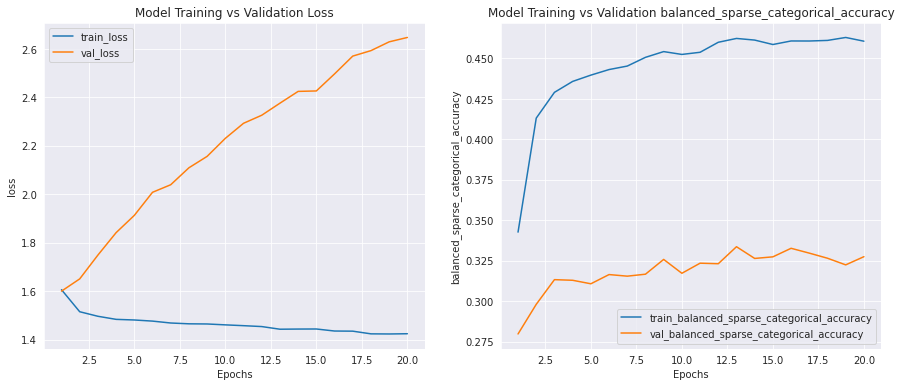

Time taken to train model (in mins) = 21
    Stopped epoch = 10
Held out data actuals shape: (4128,)
    samples from label: [0, 1, 1, 1, 2, 1, 1, 0, 1, 3]

Held out predictions shape:(4128,)
    Sample predictions: [0 1 3 4 2 2 2 3 1 4]

###########################################################
         Held-out test data set Results:
Single Label (single-output), Multi-Class Report: Sentiment
#################################################################


    Accuracy          = 34.7%
    Balanced Accuracy (average recall) = 34.0%
    Average Precision (macro) = 36.0%
    Precisions by class:
    39.4%      34.7%      38.0%      30.5%      37.3%  
    Recall Scores by class:
    39.0%      26.8%      19.2%      46.5%      38.5%  
    F1 Scores by class:
    39.2%      30.2%      25.5%      36.9%      37.9%  
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.0075395405
    set learning rate using best model: 0.0075395405
    max epochs for training = 10

Model not being saved since save_model_flag set to False...
6184

Saving vocab dictionary using pickle in tweet_classification/auto/model_2021_10_28-07_52_10/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in tweet_classification/auto/model_2021_10_28-07_52_10/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in tweet_classification/auto/m

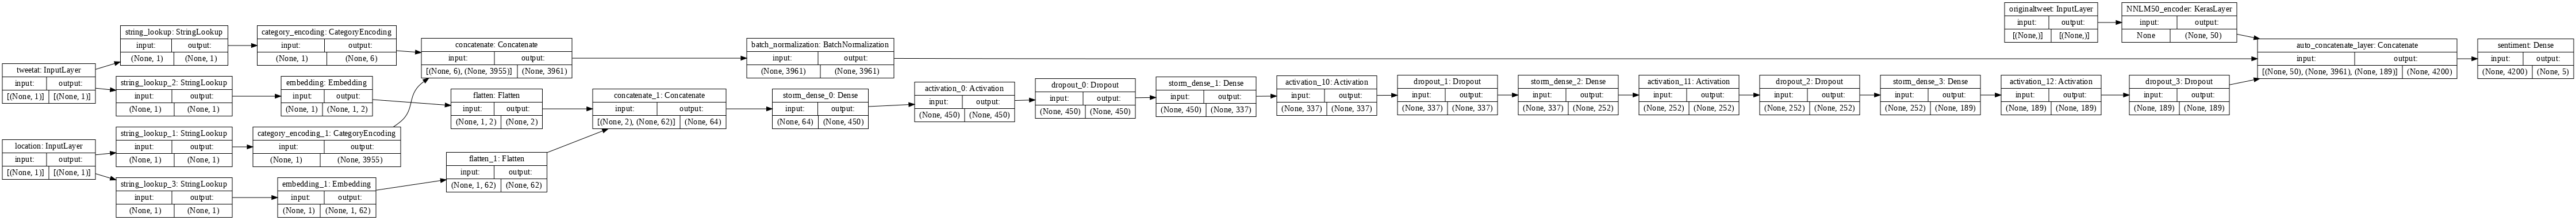

Model plot saved in file: deep_autoviml_tweet_classification_auto_model_after.png


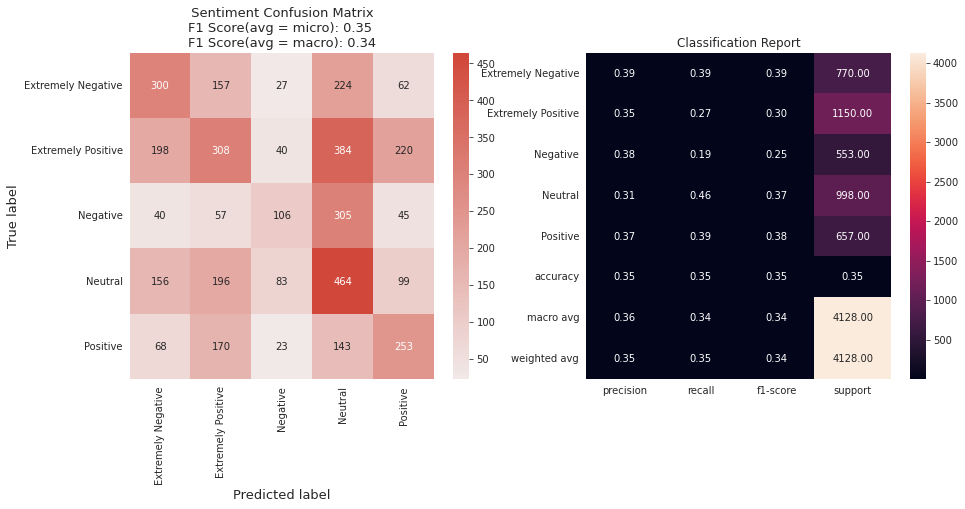

In [24]:
model, dicti = deepauto.fit(trainpath, target, keras_model_type=keras_model_type, 
                            project_name='tweet_classification',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

## Prediction

In [25]:
testpath = '/content/Corona_NLP_test.csv'
predictions = deepauto.predict(model, project_name='tweet_sentiment', test_dataset=testpath,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7fe5960045d0> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7fe5960045d0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 3798
Alert! Modified column names to satisfy rules for column names in Tensorflow...
Alert! location has 2 mixed data types: Index([<class 'str'>, <class 'float'>], dtype='object') 
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        2 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 2, high cats =

In [26]:
test = pd.read_csv(testpath)
predictions[0][:5]

array([[0.734, 0.167, 0.018, 0.076, 0.004],
       [0.311, 0.549, 0.027, 0.071, 0.042],
       [0.329, 0.482, 0.063, 0.078, 0.048],
       [0.521, 0.404, 0.025, 0.036, 0.014],
       [0.437, 0.399, 0.059, 0.066, 0.039]], dtype=float32)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
print(classification_report(test[target].values,predictions[1]))

                    precision    recall  f1-score   support

Extremely Negative       0.08      0.12      0.10       592
Extremely Positive       0.19      0.77      0.31       599
          Negative       0.29      0.11      0.16      1041
           Neutral       0.15      0.01      0.03       619
          Positive       0.23      0.03      0.05       947

          accuracy                           0.18      3798
         macro avg       0.19      0.21      0.13      3798
      weighted avg       0.20      0.18      0.12      3798



In [28]:
print('Balanced Accuracy = %0.1f%%' %(100*balanced_accuracy_score(test[target].values, predictions[1])))

Balanced Accuracy = 20.8%
